# Main tesis

### Importacion de librerias

In [421]:
## Importación librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [422]:
#Creacion de clase para modificar texto de los prints
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Lectura del archivo de datos

In [423]:
archivo = 'Datos_3.xlsm'
df = pd.read_excel(archivo)
df.head()

,Sample,Te_Verde,Te_Negro,Te_Mate,Te,Azucar,SCOBY,Liq_Ini,Brix_Ini,PH_Ini,Agua,Agua_disp,Temp,Tiempo,Brix_Out,PH_Out
0,1,1,0,0,10.0,90,797,0.3,4.0,2.8,3.0,3.3,15.4,1,3.8,3.0
1,2,0,1,0,10.0,90,930,0.3,3.8,2.7,3.0,3.3,15.5,1,3.0,3.4
2,3,0,0,1,10.0,90,839,0.3,4.0,2.5,3.0,3.3,15.5,1,3.0,3.1
3,4,1,0,0,10.0,180,772,0.3,4.0,2.8,3.0,3.3,15.7,1,5.5,3.3
4,5,0,1,0,10.0,180,737,0.3,3.8,2.7,3.0,3.3,15.4,1,5.5,3.4


### Obtencion de datos como un array de numpy
#### Adicionalmente se elimina la columna de 'Agua_disp'

In [424]:
df2 = df.drop(['Agua_disp'],axis = 1)
data_set = df2.values
#df2.head()
#data_set

# Generación de red neuronal para la validación de datos - BRIX

### Obtencion de datos de entrenamiento y de validación

In [425]:
#Se toman como datos de entrenamiento los primeros 250 datos y se dejan como datos de validación los siguiente 110 datos

X_train = data_set[0:250,1:-2]
Y_train = data_set[0:250,-2]
X_test = data_set[251:,1:-2]
Y_test = data_set[251:,-2]

### Prepocesamiento de los datos (escalamiento)

In [426]:
# Preprocesamiento de los datos (SCALING)
from sklearn.preprocessing import StandardScaler # importa scaler de scikit learn
scaler = StandardScaler() #Crea el scalador
scaler.fit(X_train) #Usa los datos de training para generar el escalamiento ** Se basa solo en los de entrenamiento
X_train = scaler.transform(X_train) #Transforma los datos de entrenamiento

#Se aplica la misma tranformación a los datos de test
X_test = scaler.transform(X_test)


In [428]:
#print(X_train)
#print(Y_train)

#### Posible parametros de la función *MLPRegressor* de sklearn:
* Activation Function: ‘identity’, ‘logistic’, ‘tanh’, ‘relu
* Alpha
* solver: ‘lbfgs’, ‘sgd’, ‘adam’
* hidden_layer_size
* max iteration


In [429]:
# Creacion de vector para guardar el desempeño de cada combinacion
performance = np.zeros(shape=[200,1])
# Creacion lista con los parametros de cada valor correspondiente
parameters = []

### Generacion de loop para probar distintas combinaciones

In [430]:
lista_fun = ["identity","logistic","tanh","relu"]
lista_solver = ["lbfgs","sgd","adam"]
lista_layer = [1,2,3,4,5,6,7,8,9,10]
ind=0
for fun in lista_fun:
    for solve in lista_solver:
        for layer in lista_layer:
            clf = MLPRegressor(activation=fun,alpha=0.1,solver=solve,
                               nesterovs_momentum=False, learning_rate_init=0.2,
                               hidden_layer_sizes=(layer), random_state=1, max_iter = 1000)
            try:
                clf.fit(X_train,Y_train)
                performance[ind] = clf.score(X_test,Y_test)
                parameters.append([fun,solve,layer])
                ind=ind+1
                #print(ind)
            except Exception:
                pass
            

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neu

In [431]:
np.set_printoptions(precision=5, suppress=True)

In [432]:
print('El maximo score obtenido fue:', color.BOLD + str(np.max(performance)) + color.END)
print('Con los parametros: ', color.BOLD + str(parameters[np.argmax(performance)]) +color.END)


El maximo score obtenido fue: 0.7412532358028551
Con los parametros:  ['logistic', 'adam', 8]


In [433]:
clf = MLPRegressor(activation=parameters[np.argmax(performance)][0],alpha=0.1,solver=parameters[np.argmax(performance)][1],
                   nesterovs_momentum=False, learning_rate_init=0.2,
                   hidden_layer_sizes=parameters[np.argmax(performance)][2], random_state=1, max_iter = 1000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.7412532358028551

In [435]:
#clf.predict(X_test)

In [436]:
clf.score(X_test,Y_test)

0.7412532358028551

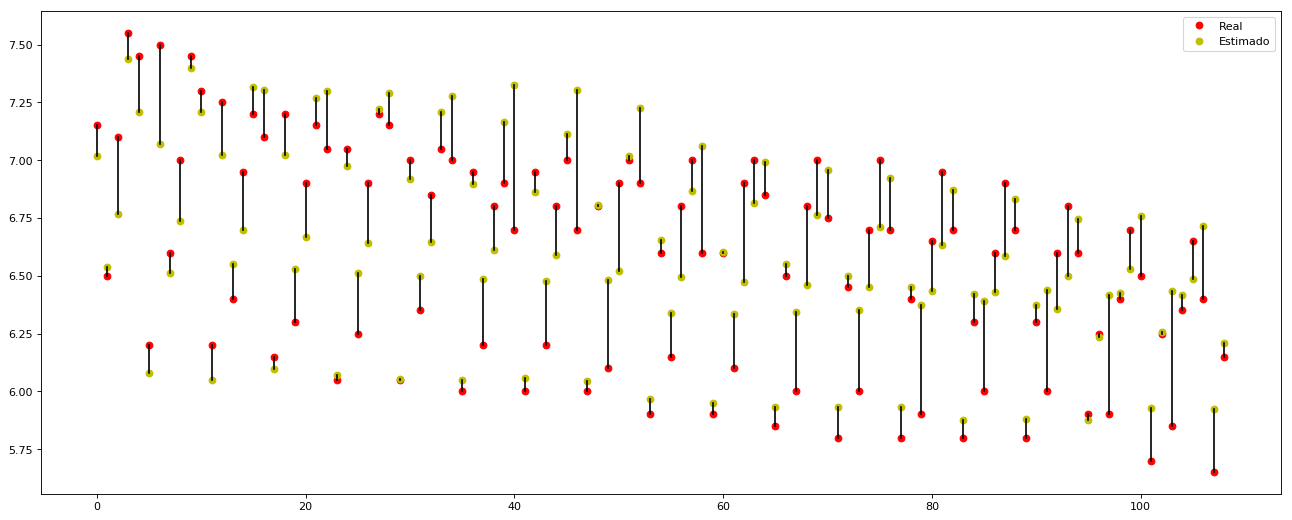

In [437]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')
t = np.arange(len(Y_test))
plt.plot(t,Y_test,'ro',label='Real')
Y_predict = clf.predict(X_test)
plt.plot(t,Y_predict,'yo',label='Estimado')
plt.legend()
for i in range(len(Y_test)):
    x1, x2 = t[i], t[i]
    y1, y2 = Y_test[i], Y_predict[i]
    plt.plot([x1,x2],[y1,y2],'k-')


In [438]:
error_abs = (Y_predict-Y_test)**2
error_abs = error**0.5

error_por = np.absolute((Y_predict-Y_test))/Y_test

brix_result = [['Promedio',np.average(error_abs),np.average(error_por)],['Max',np.max(error_abs),np.max(error_por)],\
               ['Min',np.min(error_abs),np.min(error_por)],['Desv',np.std(error_abs),np.std(error_por)]]
brix_df = pd.DataFrame(brix_result,columns = ['','Error absoluto (°Brix)','Error porcentual(%)'])
brix_df

,,Error absoluto (°Brix),Error porcentual(%)
0,Promedio,0.407122,0.029476
1,Max,0.789618,0.099796
2,Min,0.052354,0.000415
3,Desv,0.165388,0.021755


# Generación de red neuronal para la validación de datos - PH

In [439]:
#Se toman como datos de entrenamiento los primeros 250 datos y se dejan como datos de validación los siguiente 110 datos

X_train = data_set[0:250,1:-2]
Y_train_2 = data_set[0:250,-1]
X_test = data_set[251:,1:-2]
Y_test_2 = data_set[251:,-1]

In [440]:
# Creacion de vector para guardar el desempeño de cada combinacion
performance_2 = np.zeros(shape=[200,1])
# Creacion lista con los parametros de cada valor correspondiente
parameters_2 = []

### Prepocesamiento de los datos (escalamiento)

In [441]:
# Preprocesamiento de los datos (SCALING)
from sklearn.preprocessing import StandardScaler # importa scaler de scikit learn
scaler = StandardScaler() #Crea el scalador
scaler.fit(X_train) #Usa los datos de training para generar el escalamiento ** Se basa solo en los de entrenamiento
X_train = scaler.transform(X_train) #Transforma los datos de entrenamiento

#Se aplica la misma tranformación a los datos de test
X_test = scaler.transform(X_test)


#print(X_train)
#print(Y_train_2)


### Generacion de loop para probar distintas combinaciones

In [442]:
lista_fun = ["identity","logistic","tanh","relu"]
lista_solver = ["lbfgs","sgd","adam"]
lista_layer = [1,2,3,4,5,6,7,8,9,10]
ind=0
for fun in lista_fun:
    for solve in lista_solver:
        for layer in lista_layer:
            clf = MLPRegressor(activation=fun,alpha=0.1,solver=solve,
                               nesterovs_momentum=False, learning_rate_init=0.2,
                               hidden_layer_sizes=(layer), random_state=1, max_iter = 1000)
            try:
                clf.fit(X_train,Y_train_2)
                performance_2[ind] = clf.score(X_test,Y_test_2)
                parameters_2.append([fun,solve,layer])
                ind=ind+1
                #print(ind)
            except Exception:
                pass
            

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\neu

In [443]:
print('El maximo score obtenido fue:', color.BOLD + str(np.max(performance_2)) + color.END)
print('Con los parametros: ', color.BOLD + str(parameters_2[np.argmax(performance_2)]) +color.END)


El maximo score obtenido fue: 0.6998788902838442
Con los parametros:  ['relu', 'lbfgs', 5]


In [450]:
np.argmax(performance_2)

89

In [449]:
parameters_2

[['identity', 'lbfgs', 1],
 ['identity', 'lbfgs', 2],
 ['identity', 'lbfgs', 3],
 ['identity', 'lbfgs', 4],
 ['identity', 'lbfgs', 5],
 ['identity', 'lbfgs', 6],
 ['identity', 'lbfgs', 7],
 ['identity', 'lbfgs', 8],
 ['identity', 'lbfgs', 9],
 ['identity', 'lbfgs', 10],
 ['identity', 'sgd', 3],
 ['identity', 'sgd', 4],
 ['identity', 'sgd', 6],
 ['identity', 'sgd', 8],
 ['identity', 'sgd', 9],
 ['identity', 'adam', 1],
 ['identity', 'adam', 2],
 ['identity', 'adam', 3],
 ['identity', 'adam', 4],
 ['identity', 'adam', 5],
 ['identity', 'adam', 6],
 ['identity', 'adam', 7],
 ['identity', 'adam', 8],
 ['identity', 'adam', 9],
 ['identity', 'adam', 10],
 ['logistic', 'lbfgs', 1],
 ['logistic', 'lbfgs', 2],
 ['logistic', 'lbfgs', 3],
 ['logistic', 'lbfgs', 4],
 ['logistic', 'lbfgs', 5],
 ['logistic', 'lbfgs', 6],
 ['logistic', 'lbfgs', 7],
 ['logistic', 'lbfgs', 8],
 ['logistic', 'lbfgs', 9],
 ['logistic', 'lbfgs', 10],
 ['logistic', 'sgd', 1],
 ['logistic', 'sgd', 2],
 ['logistic', 'sgd', 3

In [454]:
clf = MLPRegressor(activation=parameters_2[np.argmax(performance_2)][0],alpha=0.1,solver=parameters_2[np.argmax(performance_2)][1],
                   nesterovs_momentum=False, learning_rate_init=0.2,
                   hidden_layer_sizes=parameters_2[np.argmax(performance_2)][2], random_state=1, max_iter = 1000)
clf.fit(X_train,Y_train_2)
clf.score(X_test,Y_test_2)

0.6998788902838442

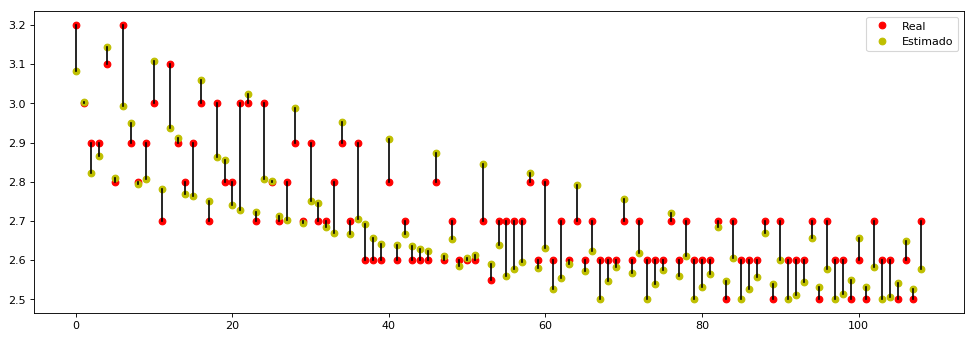

In [457]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
t = np.arange(len(Y_test_2))
plt.plot(t,Y_test_2,'ro',label='Real')
Y_predict = clf.predict(X_test)
plt.plot(t,Y_predict,'yo',label='Estimado')
plt.legend()
for i in range(len(Y_test_2)):
    x1, x2 = t[i], t[i]
    y1, y2 = Y_test_2[i], Y_predict[i]
    plt.plot([x1,x2],[y1,y2],'k-')
plt.savefig('ph_graph.png')

In [453]:
error_abs = (Y_predict-Y_test_2)**2
error_abs = error**0.5

error_por = np.absolute((Y_predict-Y_test_2))/Y_test_2

ph_result = [['Promedio',np.average(error_abs),np.average(error_por)],['Max',np.max(error_abs),np.max(error_por)],\
               ['Min',np.min(error_abs),np.min(error_por)],['Desv',np.std(error_abs),np.std(error_por)]]
ph_df = pd.DataFrame(ph_result,columns = ['','Error absoluto (pH)','Error porcentual(%)'])
ph_df

,,Error absoluto (pH),Error porcentual(%)
0,Promedio,0.407122,0.024948
1,Max,0.789618,0.090339
2,Min,0.052354,0.000422
3,Desv,0.165388,0.017250
